#install NSEpy python package to retrive the stock historical data.
#install NSEpy python package to retrive the stock historical data.

#pip install nsepy
#pip install nsetools (Not used so far)
How to install the TA-Lib in window video
https://www.youtube.com/watch?v=-tHCAEZzUhc

unofficial link to download the package for python
https://www.lfd.uci.edu/~gohlke/pythonlibs/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import talib
import seaborn as sns

# %load_ext autoreload
# %autorelod

In [4]:
import quandl  # importing the quandl for stock price
from datetime import date

token = 'aQHZz7rEw1hVor7wGXQ7'  # quandl token for python

# Set start and end dates(Date Format: yyyy/mm/dd)
start_date = "2017-01-01"
end_date = "2019-01-03"
ticker = "NSE/SBIN"  # Set the ticker

data = quandl.get(ticker, start_date=start_date,
                  end_date=end_date, authtoken=token)

data = data[['Close', 'Total Trade Quantity']]

# rename the column "Totoal trade quantity" to volume
data.rename(columns={'Total Trade Quantity': 'Volume'}, inplace=True)

data = data.to_csv('data.csv',)

data = pd.read_csv('data.csv',na_values='n/a',parse_dates=['Date'],index_col=['Date'])

data.head()

,Close,Volume
Date,,
2017-01-02,714.80,1206555.0
2017-01-03,711.75,1381976.0
2017-01-04,695.60,4258608.0
2017-01-05,698.95,2180203.0
2017-01-06,716.85,3664687.0


In [10]:
# # Create 5-day % changes of Close for the current day, and 5 days in the future
# data['5d_future_close'] = data['Close'].shift(-5)
# data['5d_close_future_pct'] = data['5d_future_close'].pct_change(5)
# data['5d_close_pct'] = data['Close'].pct_change(5)

# # Calculate the correlation matrix between the 5d close pecentage changes (current and future)
# corr = data[['5d_close_pct', '5d_close_future_pct']].corr()
# print(corr)

# # Scatter the current 5-day percent change vs the future 5-day percent change
# plt.scatter(data['5d_close_pct'], data['5d_close_future_pct'])
# plt.show()

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']
                     5d_close_future_pct  5d_close_pct      ma14     rsi14  \
5d_close_future_pct             1.000000      0.006008 -0.019010 -0.032667   
5d_close_pct                    0.006008      1.000000 -0.840488  0.675009   
ma14                           -0.019010     -0.840488  1.000000 -0.881171   
rsi14                          -0.032667      0.675009 -0.881171  1.000000   
ma30                            0.002921     -0.633206  0.861962 -0.961163   
rsi30                          -0.086704      0.532686 -0.728626  0.927773   
ma50                            0.062897     -0.473424  0.675033 -0.903849   
rsi50                          -0.128463      0.446759 -0.621759  0.832538   
ma200                           0.192488     -0.302095  0.432450 -0.634359   
rsi200                         -0.185970      0.301838 -0.414722  0.551734   

                         ma30     rsi30      ma50     

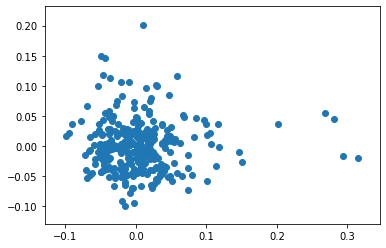

In [4]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

# Create 5-day % changes of Close for the current day, and 5 days in the future
data['5d_future_close'] = data['Close'].shift(-5)
data['5d_close_future_pct'] = data['5d_future_close'].pct_change(5)
data['5d_close_pct'] = data['Close'].pct_change(5)

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Close
    data['ma' + str(n)] = talib.SMA(data['Close'].values,
                              timeperiod=n) / data['Close']
    # Create the RSI indicator
    data['rsi' + str(n)] = talib.RSI(data['Close'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]
    
print(feature_names)

# Drop all na values
data = data.dropna()

# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = data[feature_names]
targets = data['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = data[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr_5d_close_5d_future = data[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr_5d_close_5d_future)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(data['5d_close_pct'], data['5d_close_future_pct'])
plt.show()

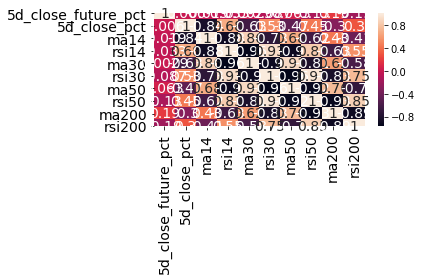

In [5]:
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True, annot_kws = {"size": 14})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot

In [9]:
# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(292, 10) (248, 10) (44, 10)


C:\Users\Deepak\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
# # historical data of nse index
# ticker_nifty50 ='NIFTY 50' #Set the ticker

# nifty50_data = pd.DataFrame(get_history(symbol=ticker_nifty50, start=start_date, end=end_date,index=True))

# nifty50_data = nifty50_data.to_csv('nifty50.csv')

# nifty50 = pd.read_csv('nifty50.csv',na_values='n/a',parse_dates=['Date'],index_col=['Date'])
# nifty50.dropna(inplace=True)
# nifty50.head()

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.148
Model:                             OLS   Adj. R-squared:                  0.116
Method:                  Least Squares   F-statistic:                     4.594
Date:                 Fri, 17 Jan 2020   Prob (F-statistic):           1.32e-05
Time:                         17:12:50   Log-Likelihood:                 451.63
No. Observations:                  248   AIC:                            -883.3
Df Residuals:                      238   BIC:                            -848.1
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.2392      0.871    

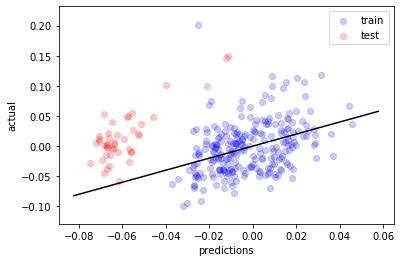

In [41]:
import statsmodels.api as sm
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

-----------------simple Decision Tree without hyperparameter--------------------
0.9999984345401409
-1.9555681424955245
--------------------------------------------------------------------------------
-----------------Finding the best Max Depth hyperparameter--------------------
max_depth= 3
Traing-R2 score= 0.25231726384613395
Testing-R square= -0.2731873651444787 

--------------------------------------------------------------------------------
-----------------Finding the best Max Depth hyperparameter--------------------
max_depth= 5
Traing-R2 score= 0.50178692398984
Testing-R square= -1.05870910133038 

--------------------------------------------------------------------------------
-----------------Finding the best Max Depth hyperparameter--------------------
max_depth= 10
Traing-R2 score= 0.981783025368144
Testing-R square= -1.8743500593115279 

--------------------------------------------------------------------------------
-----------------Use the best max_depth of 3-----------

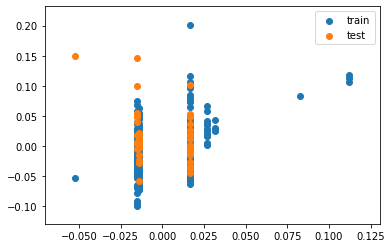

In [42]:
# Fit a decision tree
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print("-----------------simple Decision Tree without hyperparameter--------------------")
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))
print("--------------------------------------------------------------------------------")

# Loop through a few different max depths and check the performance
for d in [3, 5, 10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(train_features, train_targets)

    # Print out the scores on train and test
    print("-----------------Finding the best Max Depth hyperparameter--------------------")
    print('max_depth=', str(d))
    print("Traing-R2 score=", decision_tree.score(train_features, train_targets))
    print("Testing-R square=", decision_tree.score(test_features, test_targets), '\n')
    print("--------------------------------------------------------------------------------")

# Use the best max_depth of 3 from last exercise to fit a decision tree

print("-----------------Use the best max_depth of 3--------------------")
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

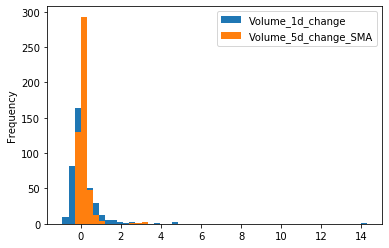

In [43]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Volume_1d_change', 'Volume_5d_change_SMA']
feature_names.extend(new_features)
data['Volume_1d_change'] = data['Volume'].pct_change()
data['Volume_5d_change_SMA'] = talib.SMA(data['Volume_1d_change'].values,
                                               timeperiod=5)

# Plot histogram of volume % change data
data[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

In [13]:
#Fit a random forest
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print('Train R2 =',rfr.score(train_features, train_targets))
print('Test R2 =',rfr.score(test_features, test_targets))

Train R2 = 0.9002756757271004
Test R2 = -0.6216848140514462


In [14]:
#Tune random forest hyperparameters
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators': [200], 'max_depth': [3], 'max_features': [4, 8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print('R square = ',test_scores[best_idx], ParameterGrid(grid)[best_idx])


R square =  -0.29714466306975607 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


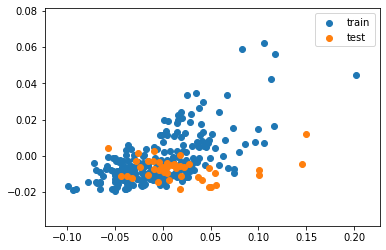

In [15]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

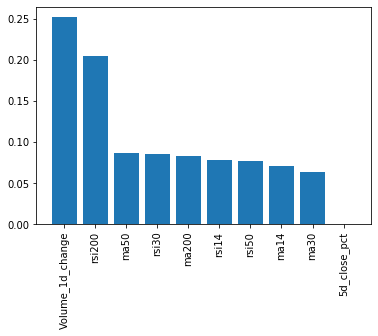

In [16]:
#Random forest feature importances
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()



In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features, train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features, test_targets))

0.43726435086560445
-0.29163264057262195


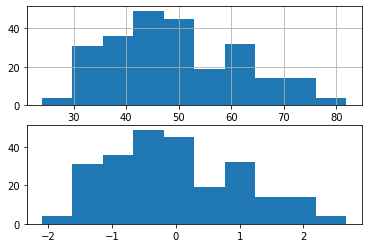

In [18]:
from sklearn.preprocessing import scale

# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 3].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 3])
plt.show()

In [19]:
#KNN MODEL
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 13):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.8333676425421377
-0.49739689395802245

n_neighbors = 3
train, test scores
0.7178126390703395
-0.3680240114151443

n_neighbors = 4
train, test scores
0.6074586618195723
-0.34060885761159954

n_neighbors = 5
train, test scores
0.500712656005931
-0.2588803501763999

n_neighbors = 6
train, test scores
0.45393390326208416
-0.3228165819422215

n_neighbors = 7
train, test scores
0.39546448443410365
-0.28410050142502064

n_neighbors = 8
train, test scores
0.35628664405096555
-0.2611419752150097

n_neighbors = 9
train, test scores
0.30943456752003884
-0.24111368453479054

n_neighbors = 10
train, test scores
0.29074430297948306
-0.24457909940259895

n_neighbors = 11
train, test scores
0.26598208652300204
-0.23136665593199401

n_neighbors = 12
train, test scores
0.25264373254721073
-0.22545011821046934



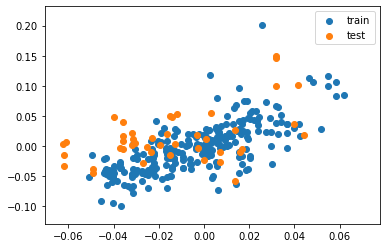

In [20]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

# ARIMA MODEL

Trend stationary: Trend is zero</br>
Variance is constant</br>
Autocorrelation is constant</br>

Interpreting the test result\n
print(results)\n
(-1.34, 0.60, 23, 1235, {'1%': -3.435, '5%': -2.913, '10%': -2.568}, 10782.87)\n

0th element is test statistic (-1.34) \n
More negative means more likely to be stationary \n
1st element is p-value: (0.60) \n
If p-value is small → reject null hypothesis. Reject non-stationary.\n
4th element is the critical test statistics
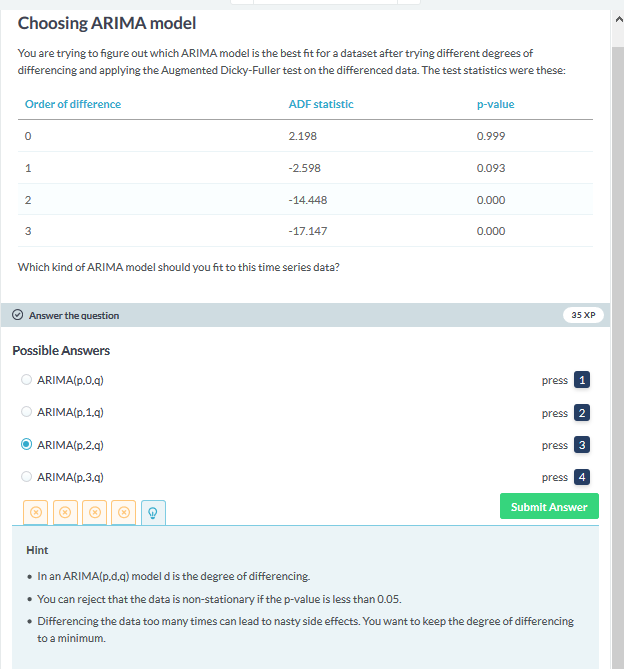

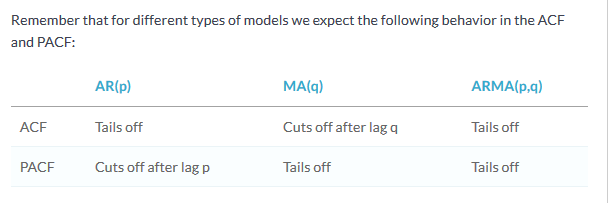

(-22.510402776521428, 0.0, 0, 495, {'1%': -3.4436298692815304, '5%': -2.867396599893435, '10%': -2.5698893429241916}, 3061.503405167863)
ADF Statistic: -22.510402776521428
p-value: 0.0
Date
2017-01-15     5.00
2017-01-22     0.15
2017-01-29    15.40
2017-02-05    11.10
2017-02-12    -1.20
Freq: W-SUN, Name: Close, dtype: float64


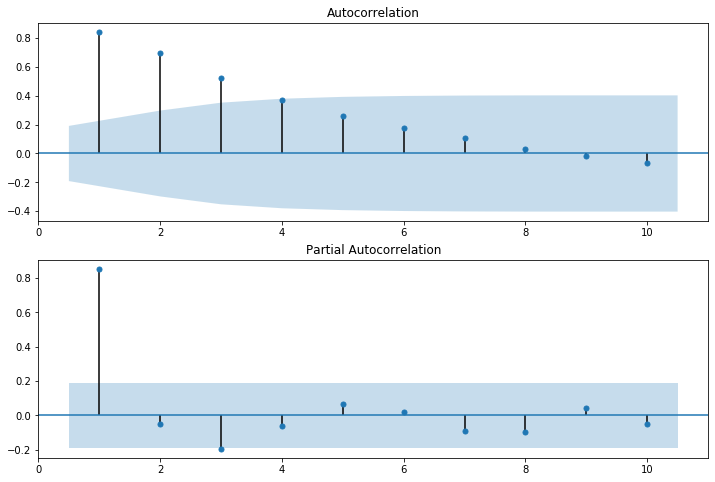

In [62]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Calculate the first difference and drop the nans

data_diff = data.diff().dropna()

result = adfuller(data['Close'])
print(result_diff)

# Print the test statistic and the p-value

print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])
print(data_diff['Close'].head())

#use the ACF and PACF plots to decide on the most appropriate order to forecast


# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(data['Close'], lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(data['Close'], lags=10, zero=False, ax=ax2)

plt.show()

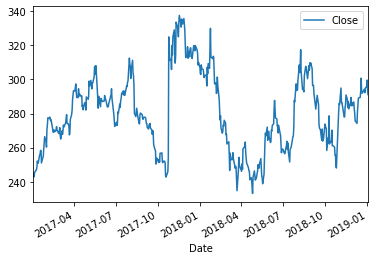

statistic: -3.1538001570941945
p-value: 0.022819551723930912


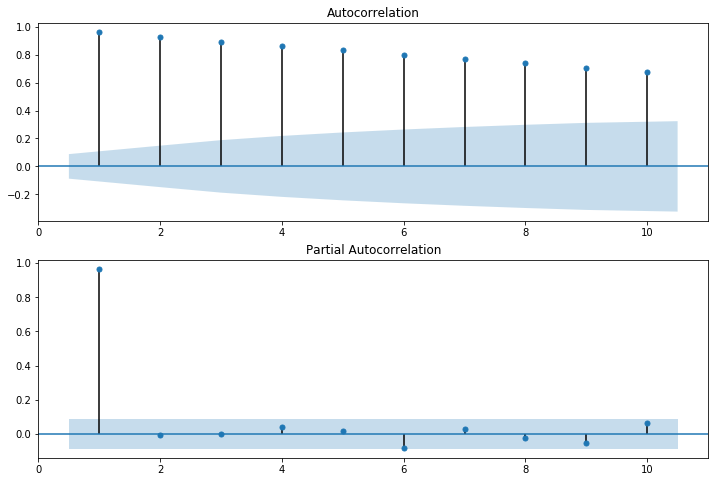

In [48]:
# Plot time series
data.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(data['Close'])

# Print test statistic
print("statistic:", result[0])

# Print p-value
print("p-value:", result[1])

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the ACF of savings on ax1
plot_acf(data, lags=10, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(data, lags=10, zero=False, ax=ax2)

plt.show()


# Autocorrelation and Time series analysis

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 497 entries, 2017-01-02 to 2019-01-03
Data columns (total 1 columns):
Close    497 non-null float64
dtypes: float64(1)
memory usage: 7.8 KB


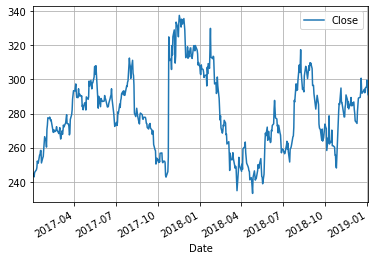

In [52]:
# Convert the date index to datetime
data.index = pd.to_datetime(data.index)
data.info()
# Plot the entire time series diet and show gridlines
data.plot(grid=True)
plt.show()

In [57]:
# Convert the daily data to weekly data
data = data.resample(rule='W', how='last')

# Compute the percentage change of prices
returns = data.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.05


C:\Users\Deepak\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  


In [64]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
data_ret = data.pct_change()

# Eliminate the NaN in the first row of returns
data_ret = data_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(data_ret['Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 8.562264341660945e-19


In [3]:
# Import plot_acf and ARMA modules from statsmodels

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

data = pd.read_csv('data.csv',na_values='n/a',parse_dates=['Date'],index_col=['Date'])
data = data.drop('Volume', axis=1)

# Compute returns from prices
returns = data.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns['Close'], lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

NameError: name 'plt' is not defined

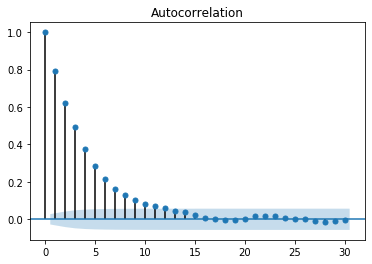

In [28]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

In [44]:
#https://www.datacamp.com/courses/introduction-to-time-series-analysis-in-python
#https://www.datacamp.com/courses/manipulating-time-series-data-in-python